<table>
    <tr>
        <td>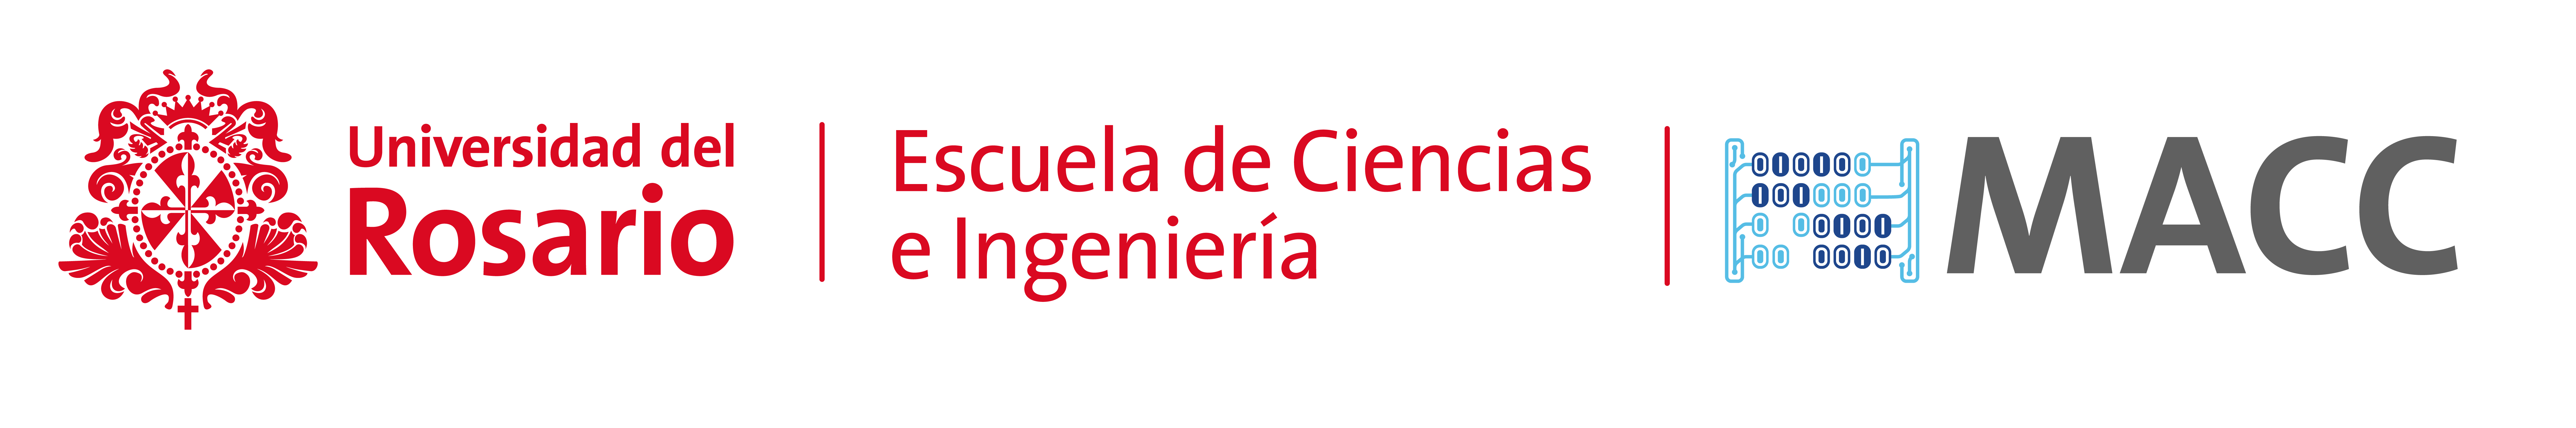</td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;text-align:center">  Regresión polinomial         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Aprendizaje Automático de Máquina </p></tp>
            <tp><p style="font-size:80%;text-align:center">Maestría MACC 2025-2</p></tp>
            <tp><p style="font-size:80%;text-align:center">Prof. Luis E. Seijas</p></tp>
        </td>
    </tr>
</table>

# Regresión polinomial

In [1]:
import numpy as np
# Se importa matplotlib para la visualización.
import matplotlib.pyplot as plt

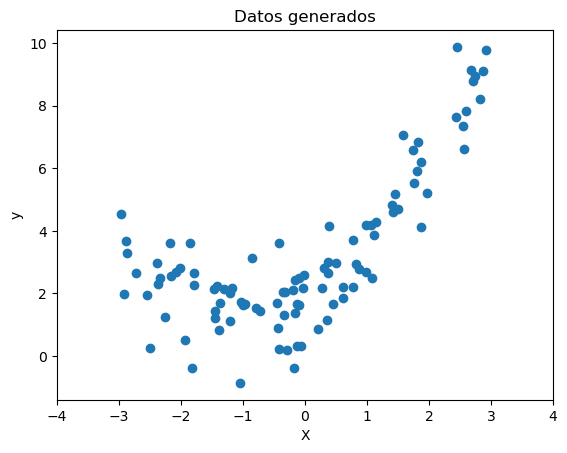

In [2]:
# Se establece el número de puntos de datos (muestras) que se generarán.
m = 100

# Se generan los datos para la variable independiente 'X'.
# 'np.random.rand(m, 1)' crea un array de 'm' filas y 1 columna con números
# aleatorios distribuidos uniformemente en el intervalo [0, 1).
# La operación '6 * ... - 3' escala estos valores al intervalo [-3, 3).
X = 6 * np.random.rand(m, 1) - 3

# Se generan los datos para la variable dependiente 'y'.
# Se basan en una función cuadrática de X (0.5 * X**2 + X + 2) a la que
# se le añade ruido gaussiano con 'np.random.randn(m, 1)'.
# Esto simula datos del mundo real que no se ajustan perfectamente a una línea
# o curva, sino que tienen cierta variabilidad aleatoria.
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)



# Se crea un gráfico de dispersión para visualizar los datos generados.
plt.scatter(X, y)

# Se establecen las etiquetas y el título del gráfico.
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos generados")

# Se ajusta el rango del eje X para una mejor visualización de los datos.
plt.xlim(-4, 4)

# Se muestra el gráfico.
plt.show()


Primera muestra original (X[0]):
[-2.33914459]

Primera muestra transformada (X_poly[0]):
[ 1.         -2.33914459  5.47159742]

Coeficientes del modelo (lin_reg.coef_):
[[0.         1.06858369 0.52934724]]

Intercepto del modelo (lin_reg.intercept_):
[1.92185364]


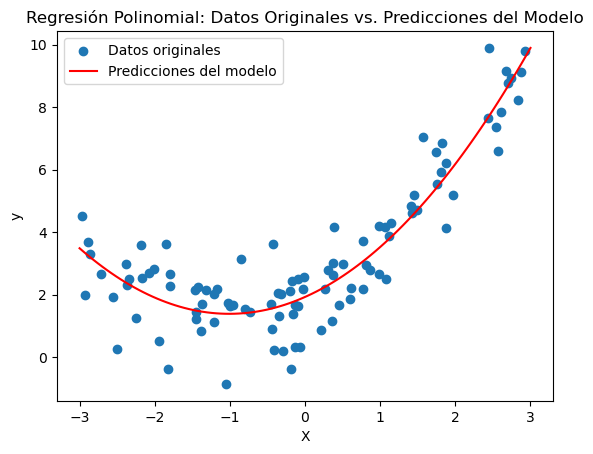

In [3]:
# Se importan las clases necesarias de scikit-learn.
# PolynomialFeatures se usa para generar características polinomiales.
# LinearRegression es el modelo de regresión lineal que se entrenará.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Se crea una instancia de PolynomialFeatures.
# El argumento 'degree=2' especifica que se generarán características
# hasta el segundo grado (es decir, para una entrada 'x', se generará [1, x, x^2]).
# 'include_bias=True' (el valor por defecto) asegura que se incluya la
# característica de sesgo (el término constante, x^0=1).
poly_features = PolynomialFeatures(degree=2, include_bias=True)

# Se ajusta el transformador a los datos 'X' y se transforman.
# El método 'fit_transform' aprende la estructura de los datos y luego
# aplica la transformación polinomial.
# 'X_poly' contendrá los datos originales más sus versiones al cuadrado.
X_poly = poly_features.fit_transform(X)

# Se imprime la primera muestra de los datos originales para comparar.
print("Primera muestra original (X[0]):")
print(X[0])

# Se imprime la primera muestra de los datos transformados.
# Esto muestra cómo un valor [x] se ha convertido en [1, x, x^2].
print("\nPrimera muestra transformada (X_poly[0]):")
print(X_poly[0])

# Se crea una instancia del modelo de Regresión Lineal.
lin_reg = LinearRegression()

# Se entrena el modelo de regresión lineal.
# Se utiliza 'X_poly' (las características polinomiales) como variables
# independientes y 'y' como la variable dependiente.
# El modelo aprenderá los coeficientes que mejor ajustan la curva
# polinomial a los datos.
lin_reg.fit(X_poly, y)

# Se imprimen los coeficientes (pendientes) del modelo ajustado.
# Corresponderán a los pesos para [1, x, x^2]. El primer coeficiente
# es para el término constante, pero a menudo se ignora ya que el
# intercepto se maneja por separado.
print("\nCoeficientes del modelo (lin_reg.coef_):")
print(lin_reg.coef_)

# Se imprime el término de intercepción (sesgo) del modelo.
# Este es el punto donde la curva del modelo cruza el eje y.
print("\nIntercepto del modelo (lin_reg.intercept_):")
print(lin_reg.intercept_)



# Se generan 100 puntos equiespaciados en el rango de -3 a 3 para X.
# Estos puntos se usarán para trazar la curva de predicción del modelo.
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# Se transforman los nuevos puntos de X a características polinomiales
# utilizando el transformador 'poly_features' ya ajustado.
X_new_poly = poly_features.transform(X_new)

# Se realizan predicciones para los nuevos puntos transformados utilizando
# el modelo de regresión lineal 'lin_reg' ya entrenado.
y_new = lin_reg.predict(X_new_poly)

# Se crea el gráfico de dispersión de los datos originales.
plt.scatter(X, y, label='Datos originales')

# Se traza la línea de predicciones del modelo.
plt.plot(X_new, y_new, "r-", label="Predicciones del modelo")

# Se establecen las etiquetas y el título del gráfico.
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Polinomial: Datos Originales vs. Predicciones del Modelo")
plt.legend()

# Se muestra el gráfico.
plt.show()


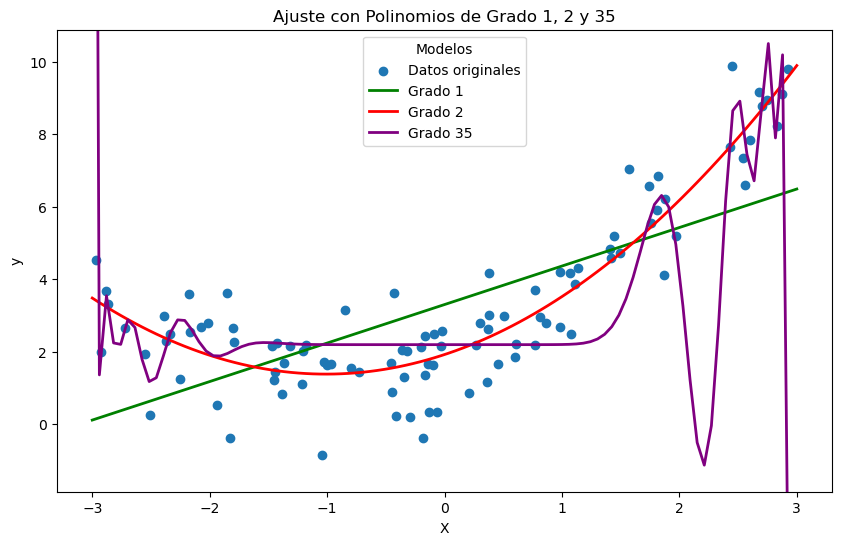

In [4]:
# Crear una nueva figura para la visualización
plt.figure(figsize=(10, 6))

# Añadir el gráfico de dispersión de los datos originales
plt.scatter(X, y, label='Datos originales')

# Definir los grados de los polinomios a ajustar y los colores para las líneas
degrees = [1, 2, 35]
colors = ['green', 'red', 'purple']

# Iterar sobre cada grado para entrenar un modelo y visualizar su predicción
for degree, color in zip(degrees, colors):
    # Crear el transformador de características polinomiales
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Transformar los datos de entrenamiento
    X_poly_train = poly_features.fit_transform(X)
    
    # Crear y entrenar el modelo de regresión lineal
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y)
    
    # Transformar los datos para la predicción
    X_new_poly_pred = poly_features.transform(X_new)
    # Realizar predicciones
    y_new_pred = lin_reg.predict(X_new_poly_pred)
    
    # Añadir la línea de predicción al gráfico
    plt.plot(X_new, y_new_pred, color=color, linewidth=2, label=f'Grado {degree}')

# Actualizar el diseño del gráfico con títulos y etiquetas
plt.title("Ajuste con Polinomios de Grado 1, 2 y 35")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(title="Modelos")

# Ajustar el rango del eje Y para una mejor visualización
plt.ylim(min(y.flatten())-1, max(y.flatten())+1)

# Mostrar el gráfico
plt.show()

### Análisis de los Resultados

El gráfico anterior compara tres modelos de regresión polinomial con diferentes grados de complejidad, ajustados a los mismos datos:

1.  **Polinomio de Grado 1 (Línea Verde):** Este es un modelo de regresión lineal simple. La línea recta no logra capturar la curvatura inherente en los datos, lo que resulta en un mal ajuste. Este es un claro ejemplo de **subajuste (underfitting)**, donde el modelo es demasiado simple para modelar la relación subyacente en los datos.

2.  **Polinomio de Grado 2 (Línea Roja):** Este modelo (una parábola) se ajusta muy bien a la tendencia general de los datos. Dado que los datos se generaron a partir de una función cuadrática con ruido, es lógico que un polinomio de segundo grado ofrezca una excelente aproximación. Este modelo representa un buen equilibrio entre simplicidad y capacidad de ajuste.

3.  **Polinomio de Grado 30 (Línea Púrpura):** Este modelo de alto grado es extremadamente flexible. La curva resultante es muy "ondulada" y trata de pasar por la mayor cantidad posible de puntos de datos de entrenamiento. Aunque puede tener un error muy bajo en estos datos, es un caso clásico de **sobreajuste (overfitting)**. El modelo está "memorizando" el ruido de los datos en lugar de aprender la tendencia general. Si se usara para predecir nuevos datos, su rendimiento sería muy pobre.

En conclusión, la visualización demuestra el compromiso entre la complejidad del modelo y su capacidad de generalización. El modelo de grado 2 es el que mejor generaliza la estructura de los datos sin ajustarse al ruido aleatorio.

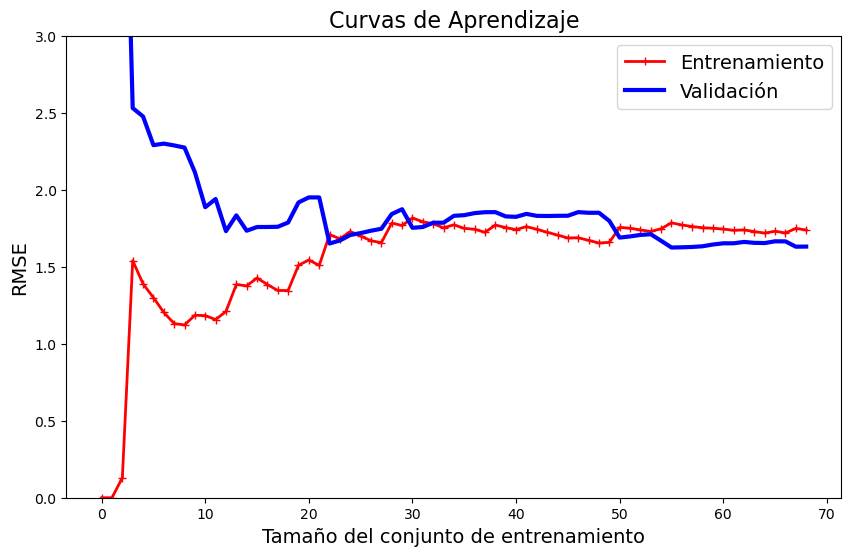

In [5]:
# Se importan las métricas y herramientas necesarias de scikit-learn.
# mean_squared_error se utiliza para calcular el error cuadrático medio.
# train_test_split se usa para dividir los datos en conjuntos de entrenamiento y validación.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    """
    Genera y muestra las curvas de aprendizaje para un modelo de regresión dado.

    Esta función divide los datos en conjuntos de entrenamiento y validación.
    Luego, entrena el modelo en subconjuntos de tamaño creciente del conjunto
    de entrenamiento y evalúa el Error Cuadrático Medio (RMSE) tanto en los
    datos de entrenamiento utilizados como en el conjunto de validación completo.
    Finalmente, grafica estos errores en función del tamaño del conjunto de
    entrenamiento para visualizar el rendimiento del modelo.

    Args:
        model: El modelo de regresión a ser evaluado (debe tener una interfaz
               compatible con scikit-learn, con métodos `fit` y `predict`).
        X (np.ndarray): Las características (variables independientes).
        y (np.ndarray): La variable objetivo (dependiente).
    """
    # Dividir los datos en un conjunto de entrenamiento (70%) y uno de validación (30%).
    # random_state asegura que la división sea reproducible.
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=10
    )
    
    # Inicializar listas para almacenar los errores de entrenamiento y validación.
    train_errors, val_errors = [], []

    # Iterar sobre diferentes tamaños del conjunto de entrenamiento, desde 1 hasta
    # el tamaño total del conjunto de entrenamiento.
    for m in range(1, len(X_train)):
        # Entrenar el modelo con un subconjunto de los datos de entrenamiento.
        model.fit(X_train[:m], y_train[:m])
        
        # Realizar predicciones sobre ese mismo subconjunto de entrenamiento.
        y_train_predict = model.predict(X_train[:m])
        # Realizar predicciones sobre el conjunto de validación completo.
        y_val_predict = model.predict(X_val)
        
        # Calcular el error cuadrático medio (MSE) y añadirlo a las listas.
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Crear una nueva figura para el gráfico.
    plt.figure(figsize=(10, 6))
    
    # Graficar la curva de error de entrenamiento. Se usa np.sqrt para convertir
    # el MSE a RMSE (Root Mean Squared Error), que está en la misma escala que 'y'.
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Entrenamiento")
    
    # Graficar la curva de error de validación.
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validación")
    
    # Añadir leyendas, etiquetas y título para hacer el gráfico interpretable.
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title("Curvas de Aprendizaje", fontsize=16)
    
    # Establecer un límite para el eje Y para una mejor visualización,
    # evitando que los errores iniciales muy altos distorsionen la escala.
    plt.ylim(0, 3)
    
    # Mostrar el gráfico.
    plt.show()


# Crear una instancia del modelo de Regresión Lineal.
lin_reg = LinearRegression()

# Llamar a la función para generar y mostrar las curvas de aprendizaje
# para el modelo de regresión lineal simple usando los datos generados.
plot_learning_curves(lin_reg, X, y)


### Análisis de las Curvas de Aprendizaje del Modelo Lineal

Las curvas de aprendizaje mostradas en el gráfico anterior son una herramienta de diagnóstico fundamental para entender el rendimiento de un modelo. En este caso, se analiza un modelo de regresión lineal simple sobre los datos generados, que tienen una estructura cuadrática.

1.  **Error de Entrenamiento (Línea Roja):**
    *   Cuando el tamaño del conjunto de entrenamiento es muy pequeño (1 o 2 muestras), el modelo puede ajustarse perfectamente a los datos, por lo que el error (RMSE) es cero.
    *   A medida que se añaden más muestras al conjunto de entrenamiento, se vuelve más difícil para el modelo lineal ajustarse perfectamente a los datos no lineales. Como resultado, el error de entrenamiento aumenta hasta que alcanza una meseta alrededor de un RMSE de 1.5.

2.  **Error de Validación (Línea Azul):**
    *   Cuando el modelo se entrena con muy pocas muestras, no puede generalizar bien, lo que resulta en un error de validación muy alto.
    *   A medida que el tamaño del conjunto de entrenamiento aumenta, el modelo aprende un poco más sobre la tendencia general (aunque de forma limitada, ya que es un modelo lineal), y el error de validación disminuye.
    *   Eventualmente, la curva de error de validación también alcanza una meseta, muy cerca de la meseta del error de entrenamiento.

### Conclusión:

*   **El error de entrenamiento es alto:** La meseta final para el error de entrenamiento se estabiliza en un valor relativamente alto, lo que significa que el modelo ni siquiera se ajusta bien a los propios datos de entrenamiento.
*   **Las curvas de error convergen:** Tanto el error de entrenamiento como el de validación convergen a un valor similar. La brecha entre ellos es muy pequeña.

Esto nos dice que el modelo de regresión lineal es demasiado simple para capturar la estructura subyacente de los datos. Añadir más ejemplos de entrenamiento no mejorará significativamente el modelo, ya que las curvas ya han llegado a una meseta. La solución en este caso sería utilizar un modelo más complejo, como el modelo de regresión polinomial de grado 2 que vimos anteriormente, que sí podría capturar la curvatura de los datos.

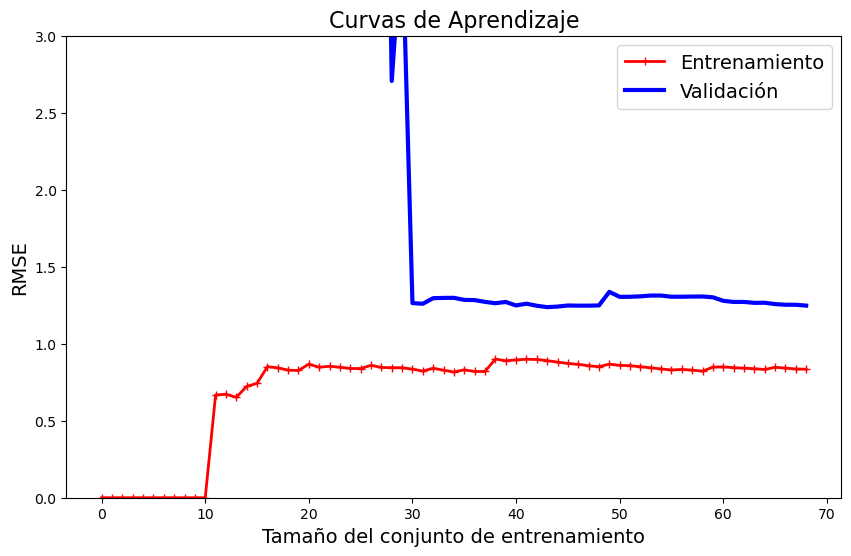

In [6]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

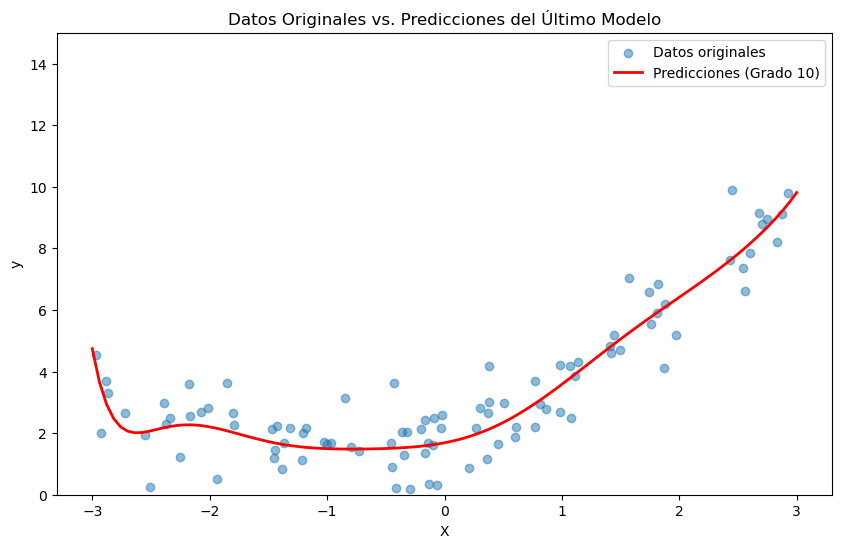

In [7]:
# Entrenar el pipeline de regresión polinomial (grado 10) con todos los datos
polynomial_regression.fit(X, y)

# Realizar predicciones con el modelo entrenado sobre el rango de X_new
y_pred_last = polynomial_regression.predict(X_new)

# Crear una nueva figura para la visualización
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(X, y, label='Datos originales', alpha=0.5)

# Graficar la línea de predicción del último modelo entrenado (grado 2)
plt.plot(X_new, y_pred_last, "r-", linewidth=2, label="Predicciones (Grado 10)")

# Añadir títulos y etiquetas
plt.title("Datos Originales vs. Predicciones del Último Modelo")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.ylim(0, 15) # Ajustar el límite del eje Y para una mejor visualización

# Mostrar el gráfico
plt.show()

### El Compromiso entre Sesgo y Varianza (Bias-Variance Tradeoff)

El **compromiso entre sesgo y varianza** es uno de los conceptos más importantes en el aprendizaje automático. Se refiere a la necesidad de equilibrar dos tipos de errores que cometen los modelos al generalizar a partir de los datos de entrenamiento:

1.  **Sesgo (Bias):**
    *   **¿Qué es?** Es el error introducido por aproximar un problema del mundo real, que puede ser muy complicado, con un modelo demasiado simple. Las suposiciones erróneas del modelo llevan a un alto sesgo.
    *   **Consecuencia:** Un modelo con alto sesgo no puede capturar la relación subyacente en los datos y, por lo tanto, tiene un mal desempeño tanto en el conjunto de entrenamiento como en el de validación. Esto se conoce como **subajuste (underfitting)**.
    *   **Ejemplo en este notebook:** El modelo de regresión lineal (polinomio de grado 1) tiene un alto sesgo porque asume una relación lineal para datos que son cuadráticos.

2.  **Varianza (Variance):**
    *   **¿Qué es?** Es el error debido a la sensibilidad del modelo a pequeñas fluctuaciones en el conjunto de entrenamiento. Un modelo con alta varianza presta demasiada atención al ruido de los datos de entrenamiento.
    *   **Consecuencia:** Un modelo con alta varianza se ajusta extremadamente bien a los datos de entrenamiento, pero no generaliza bien a datos nuevos (el conjunto de validación). Esto se conoce como **sobreajuste (overfitting)**.
    *   **Ejemplo en este notebook:** El modelo polinomial de grado 10 (o el de grado 35 visto anteriormente) tiene una alta varianza. Se ajusta a la perfección al ruido de los datos de entrenamiento, pero su curva de validación se mantiene en un nivel de error alto, indicando que no generaliza bien.

### El Compromiso

*   **Aumentar la complejidad del modelo** (por ejemplo, aumentar el grado del polinomio) generalmente **reduce el sesgo** (el modelo puede ajustarse mejor a la forma de los datos) pero **aumenta la varianza** (el modelo se vuelve más propenso a ajustarse al ruido).
*   **Disminuir la complejidad del modelo** (hacerlo más simple) **reduce la varianza** pero **aumenta el sesgo**.

El objetivo es encontrar un **punto óptimo de complejidad** que minimice el error total en datos no vistos. Las curvas de aprendizaje son una herramienta excelente para diagnosticar si un modelo sufre de alto sesgo o alta varianza y para guiar la búsqueda de este equilibrio.

### Modelos Lineales Regularizados

Para evitar el sobreajuste en modelos complejos como la regresión polinomial de alto grado, se utilizan técnicas de **regularización**. Estas técnicas restringen la complejidad del modelo al penalizar los coeficientes (pesos) grandes en la función de coste. Esto fuerza al modelo a ser más simple y, por lo tanto, a generalizar mejor.

Los tres modelos de regresión lineal regularizados más comunes son:

1.  **Regresión de Ridge (Regularización L2):**
    *   **¿Cómo funciona?** Añade un término de penalización a la función de coste que es igual a la suma de los cuadrados de los coeficientes del modelo, multiplicado por un hiperparámetro `alpha` (`α * Σ(w_i^2)`).
    *   **Efecto:** "Encoge" los coeficientes, haciéndolos más pequeños y cercanos a cero, pero sin llegar a ser exactamente cero. Esto reduce la varianza del modelo a costa de un pequeño aumento en el sesgo.
    *   **Cuándo usarlo:** Es un buen punto de partida y funciona bien cuando la mayoría de las características son útiles para la predicción.

2.  **Regresión Lasso (Least Absolute Shrinkage and Selection Operator - Regularización L1):**
    *   **¿Cómo funciona?** Añade un término de penalización igual a la suma de los valores absolutos de los coeficientes, multiplicado por `alpha` (`α * Σ|w_i|`).
    *   **Efecto:** A diferencia de Ridge, Lasso puede reducir algunos coeficientes de características a **exactamente cero**. Esto lo convierte en una herramienta útil para la **selección automática de características**, ya que elimina eficazmente las características menos importantes.
    *   **Cuándo usarlo:** Es especialmente útil cuando se sospecha que muchas de las características son irrelevantes o redundantes.

3.  **Elastic Net:**
    *   **¿Cómo funciona?** Es un término medio entre Ridge y Lasso. Su término de penalización es una mezcla de las penalizaciones de Ridge (L2) y Lasso (L1). La proporción de la mezcla se controla con otro hiperparámetro, `r` (o `l1_ratio`).
    *   **Efecto:** Combina las ventajas de ambos. Puede realizar selección de características como Lasso y, al mismo tiempo, manejar características correlacionadas de una manera más estable (Lasso tiende a seleccionar arbitrariamente una de un grupo de características correlacionadas, mientras que Elastic Net tiende a incluirlas o excluirlas juntas).
    *   **Cuándo usarlo:** Cuando hay muchas características, algunas de las cuales pueden estar correlacionadas entre sí.

En resumen, la regularización es una técnica fundamental para controlar la complejidad del modelo, prevenir el sobreajuste y mejorar su capacidad de generalización a nuevos datos. La elección entre Ridge, Lasso y Elastic Net depende de las características de los datos y de los objetivos del modelado.

### Regresión de Ridge (Regularización L2)

La **Regresión de Ridge** es una versión regularizada de la Regresión Lineal. Esto significa que se añade un término de regularización a la función de coste del modelo para evitar el sobreajuste, especialmente en modelos complejos como la regresión polinomial de alto grado.


La hipótesis de un modelo lineal se puede expresar como:
$$
\hat{y} = h_{\mathbf{w}}(\mathbf{x}) = w_0 + w_1 x_1 + \dots + w_n x_n = \mathbf{w}^T \mathbf{x}
$$
donde $\hat{y}$ es el valor predicho, $\mathbf{w}$ es el vector de pesos del modelo (incluyendo el término de sesgo $w_0$) y $\mathbf{x}$ es el vector de características (con $x_0=1$).

La función de coste para la Regresión Lineal estándar es el Error Cuadrático Medio (MSE):
$$
J(\mathbf{w})_{\text{MSE}} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2
$$
La Regresión de Ridge modifica esta función de coste añadiendo un término de penalización que es proporcional al cuadrado de la magnitud de los pesos. Este término es la **norma L2** del vector de pesos. La función de coste de Ridge es:

$$
J(\mathbf{w})_{\text{Ridge}} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2 + \alpha \sum_{j=1}^{n} w_j^2
$$

*   **$\alpha$ (alpha):** Es el hiperparámetro de regularización que controla la intensidad de la penalización.
    *   Si $\alpha = 0$, la penalización desaparece y la Regresión de Ridge se convierte en una Regresión Lineal estándar.
    *   A medida que $\alpha$ aumenta, la penalización sobre los pesos se vuelve más fuerte. Para minimizar la función de coste, el modelo se ve forzado a reducir la magnitud de sus pesos $w_j$, acercándolos a cero.
    *   Si $\alpha$ es muy grande, todos los pesos tenderán a ser casi cero, resultando en un modelo muy simple (una línea horizontal que pasa por la media de los datos), lo que puede causar subajuste (alto sesgo).

El objetivo es encontrar un valor de $\alpha$ que ofrezca el mejor equilibrio, reduciendo la varianza del modelo (haciéndolo menos sensible al ruido de los datos de entrenamiento) a costa de un pequeño aumento en su sesgo.

**Nota:** Por convención, el término de sesgo $w_0$ no se regulariza. La suma de la penalización va desde $j=1$ hasta $n$, excluyendo $w_0$.

**Importante:** La regularización de Ridge es sensible a la escala de las características de entrada. Si una característica tiene una escala mucho mayor que otras, su coeficiente será penalizado de manera desproporcionada. Por lo tanto, es fundamental **escalar los datos** (por ejemplo, usando `StandardScaler` de scikit-learn) antes de entrenar un modelo de Ridge.

### Solución de Forma Cerrada

Al igual que la Regresión Lineal, la Regresión de Ridge tiene una solución de forma cerrada que permite calcular directamente el vector de pesos $\hat{\mathbf{w}}$ que minimiza la función de coste.

La solución para la Regresión Lineal (Ecuación Normal) es:
$$
\hat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Para la Regresión de Ridge, la solución se modifica para incluir el término de regularización:
$$
\hat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$$

Donde:
*   $\mathbf{X}$ es la matriz de características (con una columna de unos para el término de sesgo).
*   $\mathbf{y}$ es el vector de valores objetivo.
*   $\alpha$ es el hiperparámetro de regularización.
*   $\mathbf{A}$ es una matriz identidad de tamaño $(n+1) \times (n+1)$ (donde $n$ es el número de características) con un 0 en la esquina superior izquierda. Esto asegura que el término de sesgo $w_0$ no sea penalizado.
$$
\mathbf{A} = \begin{pmatrix}
0 & 0 & \dots & 0 \\
0 & 1 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 1
\end{pmatrix}
$$
Una ventaja de la Regresión de Ridge es que el término $\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A}$ siempre es invertible, a diferencia de $\mathbf{X}^T \mathbf{X}$ en la Regresión Lineal, que puede no serlo si hay multicolinealidad (características muy correlacionadas) o si el número de características es mayor que el número de muestras.

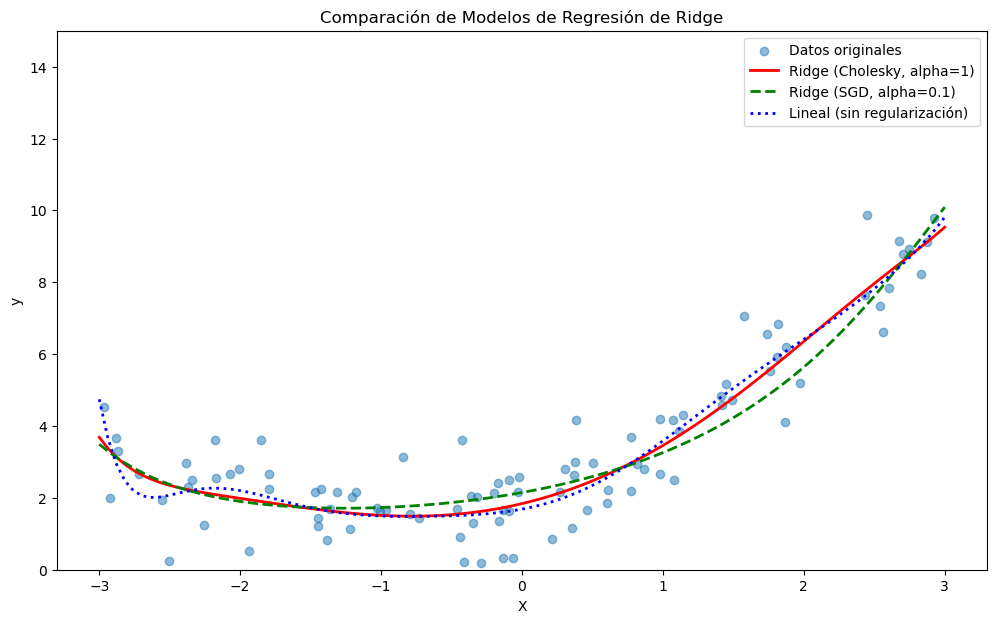

In [8]:
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Se importan las clases necesarias de scikit-learn

# --- Modelo 1: Regresión de Ridge con solución de forma cerrada (Cholesky) ---

# Se crea un pipeline para la regresión de Ridge.
# 1. PolynomialFeatures: Genera características polinomiales de grado 10.
# 2. StandardScaler: Escala las características (importante para la regularización).
# 3. Ridge: Aplica el modelo de Ridge con un hiperparámetro alpha=1 y el solver 'cholesky'.
ridge_reg_cholesky = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1, solver="cholesky"))
])
# Se entrena el modelo con los datos originales.
ridge_reg_cholesky.fit(X, y)
# Se realizan predicciones para la visualización.
y_pred_ridge_cholesky = ridge_reg_cholesky.predict(X_new)


# --- Modelo 2: Regresión de Ridge con Gradiente Descendente Estocástico (SGD) ---

# Se crea un pipeline similar, pero usando SGDRegressor.
# 1. PolynomialFeatures: Grado 10.
# 2. StandardScaler: Escalamiento de características.
# 3. SGDRegressor: Se configura para realizar regresión de Ridge.
#    - penalty='l2': Especifica que se usará la penalización de Ridge.
#    - alpha=0.1: Controla la fuerza de la regularización (equivalente a alpha en Ridge).
#    - max_iter=1000, tol=1e-3: Criterios de parada para el entrenamiento.
#    - random_state=42: Para reproducibilidad.
ridge_reg_sgd = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
    ("sgd_ridge", SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000, tol=1e-3, random_state=42))
])
# Se entrena el modelo. Nota: y.ravel() convierte 'y' a un array 1D, requerido por SGDRegressor.
ridge_reg_sgd.fit(X, y.ravel())
# Se realizan predicciones.
y_pred_ridge_sgd = ridge_reg_sgd.predict(X_new)


# --- Visualización de los resultados ---

# Se crea una nueva figura.
plt.figure(figsize=(12, 7))

# Se grafican los datos originales.
plt.scatter(X, y, alpha=0.5, label='Datos originales')

# Se grafica la predicción del modelo de Ridge con Cholesky.
plt.plot(X_new, y_pred_ridge_cholesky, "r-", linewidth=2, label="Ridge (Cholesky, alpha=1)")

# Se grafica la predicción del modelo de Ridge con SGD.
plt.plot(X_new, y_pred_ridge_sgd, "g--", linewidth=2, label="Ridge (SGD, alpha=0.1)")

# Se grafica el modelo sin regularización (de una celda anterior) para comparar.
plt.plot(X_new, y_pred_last, "b:", linewidth=2, label="Lineal (sin regularización)")

# Se configuran los títulos, etiquetas y leyenda.
plt.title("Comparación de Modelos de Regresión de Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.ylim(0, 15)

# Se muestra el gráfico.
plt.show()

### Regresión Lasso (Regularización L1)

La **Regresión Lasso** (Least Absolute Shrinkage and Selection Operator) es otra versión regularizada de la Regresión Lineal, diseñada para combatir el sobreajuste. Al igual que Ridge, añade un término de penalización a la función de coste, pero utiliza la **norma L1** de los pesos en lugar de la norma L2.

La función de coste para la Regresión Lasso es:

$$
J(\mathbf{w})_{\text{Lasso}} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2 + \alpha \sum_{j=1}^{n} |w_j|
$$

*   **Término de Penalización L1:** El término $\alpha \sum|w_j|$ es la suma de los valores absolutos de los coeficientes del modelo (excluyendo el término de sesgo $w_0$), multiplicada por el hiperparámetro $\alpha$.

*   **Hiperparámetro $\alpha$:** Al igual que en Ridge, $\alpha$ controla la fuerza de la regularización.
    *   Si $\alpha$, Lasso es idéntico a la Regresión Lineal.
    *   A medida que $\alpha$ aumenta, la penalización obliga al modelo a reducir la magnitud de los coeficientes.

### Característica Clave: Selección Automática de Características

La diferencia fundamental y la principal ventaja de Lasso sobre la Regresión de Ridge es su capacidad para realizar una **selección automática de características**.

*   **Efecto de la Penalización L1:** La naturaleza de la norma L1 (valor absoluto) tiene la propiedad de que, a medida que $\alpha$ aumenta, no solo reduce los coeficientes, sino que puede forzarlos a ser **exactamente cero**.
*   **Consecuencia:** Si el coeficiente de una característica se convierte en cero, significa que esa característica es completamente eliminada del modelo. El modelo se vuelve "disperso" (sparse), es decir, tiene pocos coeficientes distintos de cero.

Esto contrasta con la Regresión de Ridge, que encoge los coeficientes haciéndolos muy cercanos a cero, pero rara vez los elimina por completo. Por lo tanto, Lasso es extremadamente útil cuando se sospecha que muchas de las características de entrada son irrelevantes o redundantes.

### ¿Por qué Lasso produce soluciones dispersas? (Intuición Geométrica)

Imaginemos un modelo con solo dos características ($w_1, w_2$). La regularización impone una restricción sobre los valores que pueden tomar los coeficientes.
*   **Ridge (L2):** La restricción es $w_1^2 + w_2^2 \le C$, que es un **círculo**.
*   **Lasso (L1):** La restricción es $|w_1| + |w_2| \le C$, que es un **rombo** (o diamante).

La solución óptima es el punto donde las curvas de nivel de la función de coste MSE (elipses) tocan por primera vez el área de restricción.
*   Con la restricción circular de Ridge, es poco probable que el punto de tangencia ocurra en un eje (donde un coeficiente es cero).
*   Con la restricción en forma de rombo de Lasso, es muy probable que el punto de tangencia ocurra en uno de los **vértices**, donde uno de los coeficientes es exactamente cero. Esto es lo que conduce a la dispersión.

### Consideraciones Importantes

1.  **Escalamiento de Características:** Al igual que Ridge, Lasso es sensible a la escala de las características. Es crucial escalar los datos (por ejemplo, con `StandardScaler`) antes de entrenar el modelo.

2.  **Solución Numérica:** A diferencia de la Regresión Lineal y Ridge, Lasso no tiene una solución de forma cerrada (una ecuación directa para calcular los pesos) porque la función de valor absoluto no es diferenciable en cero. Se resuelve utilizando algoritmos de optimización iterativos, como el descenso por coordenadas, que `scikit-learn` implementa de manera eficiente.

3.  **Comportamiento con Características Correlacionadas:** Si un grupo de características está altamente correlacionado, Lasso tiende a seleccionar una de ellas de forma algo arbitraria y a reducir las demás a cero. En estos casos, la Regresión de **Elastic Net**, que combina las penalizaciones L1 y L2, suele ser una mejor opción.

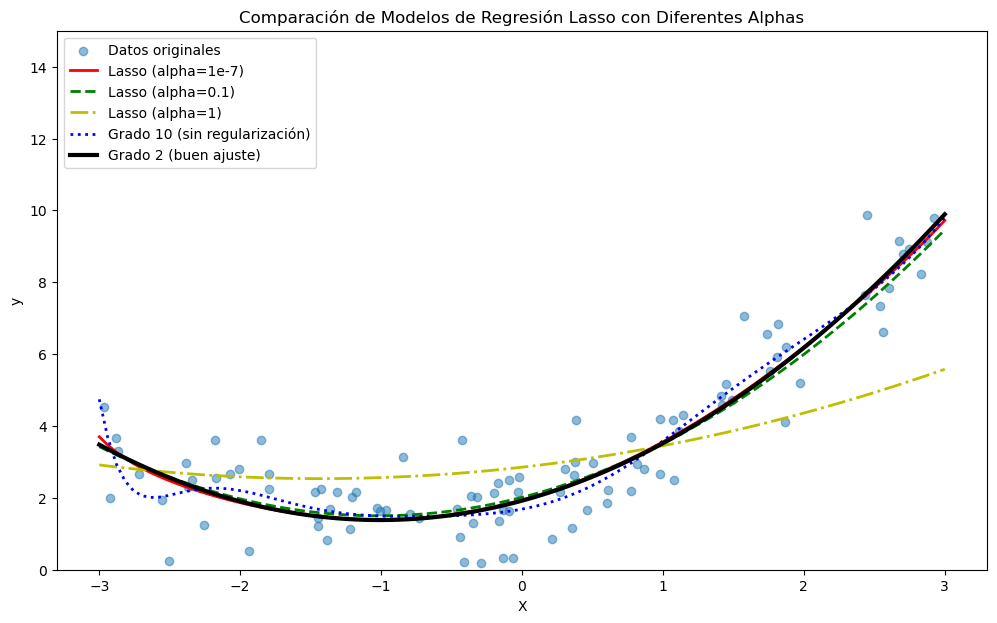

In [9]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# --- Modelo de Grado 2 (para comparación) ---
# Se crea y entrena un modelo de regresión polinomial de grado 2, que se identificó
# anteriormente como un buen modelo, para usarlo como referencia.
poly_reg_deg2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])
poly_reg_deg2.fit(X, y)
y_pred_deg2 = poly_reg_deg2.predict(X_new)


# --- Creación y entrenamiento de modelos Lasso con diferentes alphas ---

# Se crea una nueva figura para la visualización.
plt.figure(figsize=(12, 7))

# Se grafican los datos originales como punto de referencia.
plt.scatter(X, y, alpha=0.5, label='Datos originales')

# Se define una lista de tuplas, cada una con un valor de alpha, un estilo de línea
# y una etiqueta para el gráfico. Se usarán para comparar el efecto de la regularización.
# alpha=1e-7: Regularización casi nula, se espera un comportamiento similar al sobreajuste.
# alpha=0.1: Regularización moderada.
# alpha=1: Regularización fuerte, se espera un modelo más simple (subajustado).
model_params = [
    (1e-8, "r-", "Lasso (alpha=1e-7)"),
    (0.1, "g--", "Lasso (alpha=0.1)"),
    (1, "y-.", "Lasso (alpha=1)")
]

# Se itera sobre los parámetros definidos para entrenar y graficar cada modelo.
for alpha, style, label in model_params:
    # Se crea un pipeline para cada modelo Lasso.
    # 1. PolynomialFeatures: Genera características polinomiales de grado 10.
    # 2. StandardScaler: Escala las características (esencial para Lasso).
    # 3. Lasso: Aplica el modelo Lasso con el alpha correspondiente.
    #    - random_state=42 para reproducibilidad.
    #    - max_iter=1000000 para asegurar que el algoritmo de optimización converja.
    #    - tol=0.1 para relajar la condición de parada y evitar warnings de convergencia.
    lasso_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=alpha, random_state=42, max_iter=1000, tol=0.1))
    ])
    
    # Se entrena el pipeline con los datos.
    lasso_reg.fit(X, y)
    
    # Se realizan predicciones sobre el nuevo conjunto de datos X_new.
    y_pred_lasso = lasso_reg.predict(X_new)
    
    # Se grafica la curva de predicción del modelo.
    plt.plot(X_new, y_pred_lasso, style, linewidth=2, label=label)

# Se grafica el modelo sin regularización (de una celda anterior) para comparar.
plt.plot(X_new, y_pred_last, "b:", linewidth=2, label="Grado 10 (sin regularización)")

# Se grafica el modelo de grado 2 como referencia.
plt.plot(X_new, y_pred_deg2, "k-", linewidth=3, label="Grado 2 (buen ajuste)")

# Se configuran los títulos, etiquetas y leyenda del gráfico.
plt.title("Comparación de Modelos de Regresión Lasso con Diferentes Alphas")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.ylim(0, 15)

# Se muestra el gráfico.
plt.show()

### Regresión con Elastic Net

La **Regresión con Elastic Net** es un modelo de regresión lineal regularizado que actúa como un término medio entre la Regresión de Ridge (L2) y la Regresión Lasso (L1). Combina las penalizaciones de ambas técnicas, lo que le permite heredar las mejores características de cada una.

Es particularmente útil cuando hay un gran número de características, o cuando varias características están fuertemente correlacionadas entre sí.

### Función de Coste de Elastic Net

La función de coste de Elastic Net se construye añadiendo tanto una penalización L1 como una L2 a la función de coste del Error Cuadrático Medio (MSE). La fórmula es la siguiente:

$$
J(\mathbf{w})_{\text{ElasticNet}} = \underbrace{\frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2}_{\text{Término MSE}} + \underbrace{r \alpha \sum_{j=1}^{n} |w_j|}_{\text{Penalización L1 (Lasso)}} + \underbrace{\frac{1-r}{2} \alpha \sum_{j=1}^{n} w_j^2}_{\text{Penalización L2 (Ridge)}}
$$

Esta función de coste se controla mediante dos hiperparámetros clave:

1.  **$\alpha$ (alpha):** Es el hiperparámetro de regularización principal que controla la **fuerza total** de la penalización.
    *   Si $\alpha = 0$, no hay regularización y Elastic Net se convierte en una Regresión Lineal simple.
    *   A medida que $\alpha$ aumenta, la penalización sobre los coeficientes se vuelve más fuerte, lo que obliga al modelo a ser más simple.

2.  **$r$ (ratio de mezcla, `l1_ratio` en scikit-learn):** Este hiperparámetro controla la **proporción** entre la penalización L1 y L2. Su valor está en el rango de 0 a 1.
    *   **Si $r = 1$: ** La penalización L2 desaparece (`1-r = 0`). El modelo se convierte en una **Regresión Lasso**.
    *   **Si $r = 0$: ** La penalización L1 desaparece. El modelo se convierte en una **Regresión de Ridge**.
    *   **Si $0 < r < 1$: ** El modelo es una combinación de ambas. Por ejemplo, si $r = 0.5$, las penalizaciones L1 y L2 tienen la misma importancia (ajustadas por $\alpha$).

### Ventajas y Cuándo Usarlo

Elastic Net combina lo mejor de ambos mundos:

*   **Realiza selección de características:** Al igual que Lasso, puede reducir los coeficientes de las características menos importantes a exactamente cero, eliminándolas del modelo.
*   **Maneja características correlacionadas:** A diferencia de Lasso, que tiende a seleccionar arbitrariamente una característica de un grupo de variables correlacionadas, Elastic Net tiende a incluir o excluir al grupo completo. La parte de Ridge (L2) estabiliza el modelo en presencia de multicolinealidad.

Por lo general, se prefiere Elastic Net sobre Lasso cuando el número de características es mayor que el número de muestras de entrenamiento o cuando se sabe que varias características están correlacionadas. En la práctica, si no se está seguro de qué regularización usar, Elastic Net con un valor de $r$ intermedio (por ejemplo, 0.5) es a menudo un buen punto de partida.

**Importante:** Al igual que con Ridge y Lasso, es fundamental **escalar las características** (por ejemplo, usando `StandardScaler`) antes de entrenar un modelo de Elastic Net, ya que es sensible a la escala de los datos de entrada.

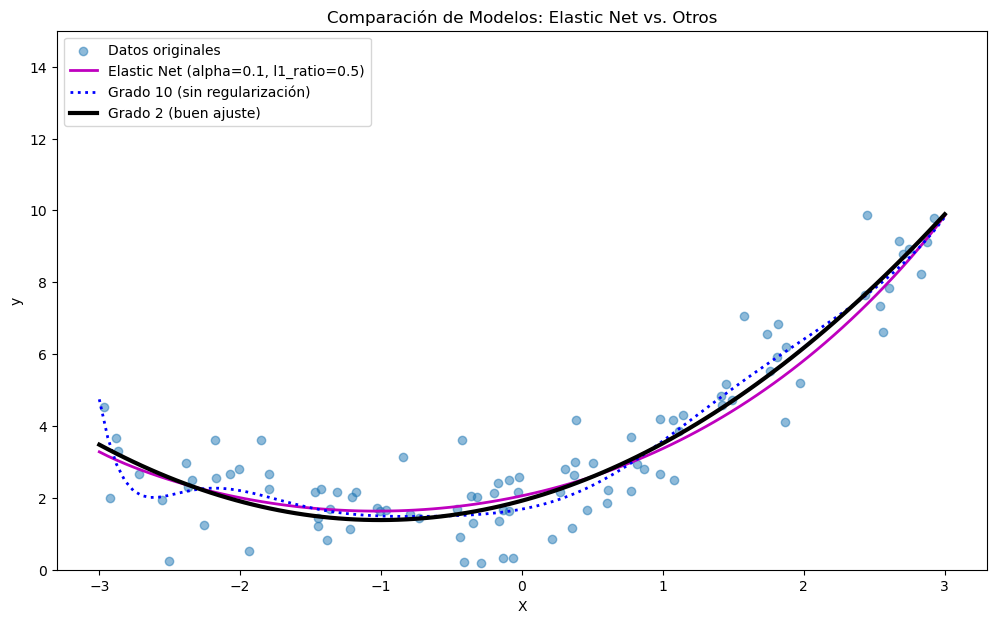

In [10]:
from sklearn.linear_model import ElasticNet

# --- Creación y entrenamiento del modelo Elastic Net ---

# Se crea un pipeline para la regresión con Elastic Net.
# 1. PolynomialFeatures: Genera características polinomiales de grado 20.
# 2. StandardScaler: Escala las características, lo cual es crucial para la regularización.
# 3. ElasticNet: Aplica el modelo Elastic Net.
#    - alpha=0.1: Controla la fuerza total de la regularización.
#    - l1_ratio=0.5: Establece una mezcla equitativa entre las penalizaciones L1 (Lasso) y L2 (Ridge).
#    - random_state=42: Para asegurar la reproducibilidad de los resultados.
elastic_net_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
    ("scaler", StandardScaler()),
    ("elastic_net", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
])

# Se entrena el pipeline con los datos originales.
elastic_net_reg.fit(X, y)

# Se realizan predicciones sobre el nuevo conjunto de datos X_new para la visualización.
y_pred_elastic = elastic_net_reg.predict(X_new)


# --- Visualización de los resultados ---

# Se crea una nueva figura para el gráfico.
plt.figure(figsize=(12, 7))

# Se grafican los datos originales.
plt.scatter(X, y, alpha=0.5, label='Datos originales')

# Se grafica la curva de predicción del modelo Elastic Net.
plt.plot(X_new, y_pred_elastic, "m-", linewidth=2, label="Elastic Net (alpha=0.1, l1_ratio=0.5)")

# Se grafica el modelo sin regularización (sobreajustado) para comparar.
plt.plot(X_new, y_pred_last, "b:", linewidth=2, label="Grado 10 (sin regularización)")

# Se grafica el modelo de grado 2 (buen ajuste) como referencia.
plt.plot(X_new, y_pred_deg2, "k-", linewidth=3, label="Grado 2 (buen ajuste)")

# Se configuran los títulos, etiquetas y leyenda del gráfico.
plt.title("Comparación de Modelos: Elastic Net vs. Otros")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.ylim(0, 15)

# Se muestra el gráfico.
plt.show()

### Detención Temprana (Early Stopping)

La **detención temprana** es otra técnica de regularización utilizada para evitar el sobreajuste en modelos iterativos (como los que se entrenan con Gradiente Descendente). Es una de las formas más simples y efectivas de regularización.

### ¿Cómo Funciona?

La idea principal es monitorear el rendimiento del modelo en un conjunto de datos de validación separado durante el proceso de entrenamiento y detener el entrenamiento tan pronto como el rendimiento en este conjunto de validación deje de mejorar y comience a empeorar.

El proceso es el siguiente:

1.  **Dividir los datos:** Se dividen los datos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba.
2.  **Entrenamiento iterativo:** El modelo se entrena de forma iterativa (por ejemplo, por épocas). En cada iteración, se calcula el error tanto en el conjunto de entrenamiento como en el de validación.
3.  **Monitoreo del error de validación:**
    *   Al principio, a medida que el modelo aprende, tanto el error de entrenamiento como el de validación disminuyen.
    *   Después de cierto punto, el modelo comienza a sobreajustarse a los datos de entrenamiento. El error de entrenamiento seguirá disminuyendo, pero el error en el conjunto de validación comenzará a aumentar.
4.  **Detener el entrenamiento:** El entrenamiento se detiene en el momento en que el error de validación alcanza su punto mínimo. El estado del modelo (los pesos) en ese punto se guarda como el mejor modelo.

### Intuición Gráfica

Si graficamos el error de entrenamiento y el de validación a lo largo de las épocas de entrenamiento, típicamente observaremos:
*   **Curva de error de entrenamiento:** Desciende continuamente.
*   **Curva de error de validación:** Desciende hasta un punto mínimo y luego comienza a subir, formando una especie de "U".

El punto óptimo para detener el entrenamiento es en el fondo de esa "U", donde el modelo tiene la mejor capacidad de generalización.

### Implementación Práctica

En la práctica, es común implementar la detención temprana con un parámetro de **"paciencia"**. Esto significa que el entrenamiento no se detiene inmediatamente después de que el error de validación aumente, sino que se espera un número determinado de épocas (`patience`) para ver si el error vuelve a bajar. Si después de esas épocas de "paciencia" el error no ha mejorado (no ha alcanzado un nuevo mínimo), entonces el entrenamiento se detiene.

### Ventajas

*   **Simplicidad:** Es muy fácil de entender e implementar.
*   **Eficiencia:** Puede ahorrar mucho tiempo de entrenamiento, ya que no es necesario completar un número predefinido y potencialmente muy grande de épocas.

En resumen, la detención temprana es una estrategia pragmática que encuentra un buen equilibrio en el compromiso sesgo-varianza al detener el entrenamiento justo antes de que el modelo comience a sobreajustarse.

Detención temprana en la época 366!


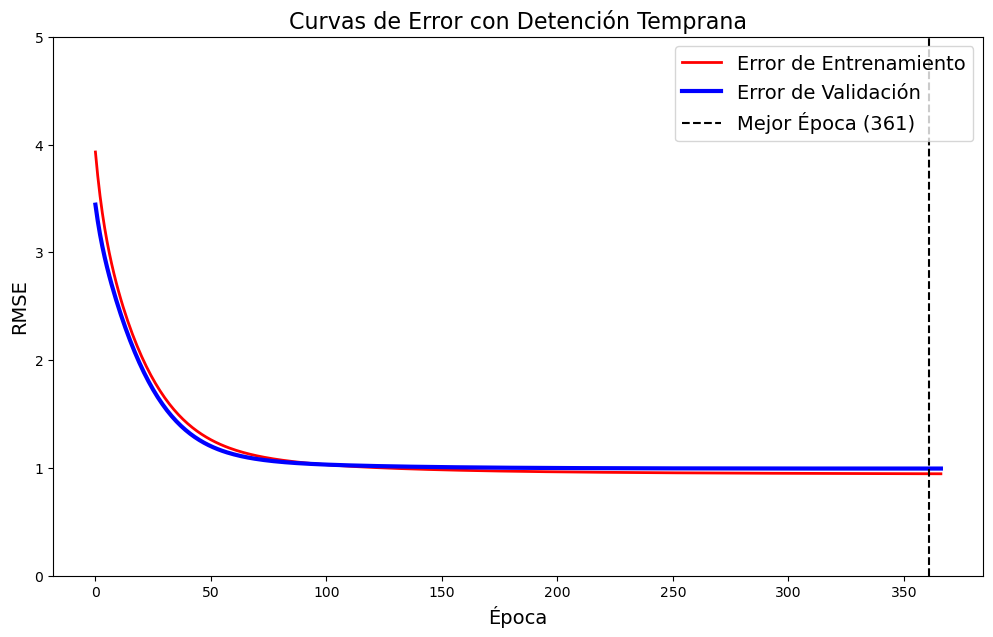

NotFittedError: This SGDRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

# 1. Preparación de los datos
# Se dividen los datos en conjuntos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea un pipeline para añadir características polinomiales de alto grado (propensas al sobreajuste) y escalarlas.
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler())
])

# Se ajusta el pipeline con los datos de entrenamiento y se transforman ambos conjuntos.
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# 2. Implementación de la Detención Temprana
# Se inicializa un modelo de Gradiente Descendente Estocástico.
# - max_iter=1, warm_start=True: Permite entrenar una época a la vez.
# - tol=None: Desactiva el criterio de parada por tolerancia.
# - penalty=None: Sin regularización, para que el sobreajuste sea más evidente.
# - learning_rate='constant', eta0=0.0005: Tasa de aprendizaje pequeña y constante.
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
patience = 5  # Número de épocas a esperar sin mejora antes de detenerse.
epochs_no_improve = 0

train_errors, val_errors = [], []

# Bucle de entrenamiento por épocas (máximo 1000).
for epoch in range(1000):
    # Entrenar por una época.
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    
    # Predecir y calcular errores en ambos conjuntos.
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

    # Comprobar si el error de validación ha mejorado.
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)  # Guardar una copia del mejor modelo hasta ahora.
        epochs_no_improve = 0  # Reiniciar el contador de paciencia.
    else:
        epochs_no_improve += 1
        # Si no hay mejora después de 'patience' épocas, detener el entrenamiento.
        if epochs_no_improve >= patience:
            print(f"Detención temprana en la época {epoch}!")
            break

# 3. Visualización de los resultados
plt.figure(figsize=(12, 7))

# Graficar las curvas de error de entrenamiento y validación.
plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="Error de Entrenamiento")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Error de Validación")
if best_epoch is not None:
    # Marcar la mejor época encontrada.
    plt.axvline(x=best_epoch, color='k', linestyle='--', label=f'Mejor Época ({best_epoch})')

# Configurar el gráfico de errores.
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Época", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Curvas de Error con Detención Temprana", fontsize=16)
plt.ylim(0, 5)
plt.show()

# Visualizar el ajuste del mejor modelo guardado.
if best_model is not None:
    # Realizar predicciones con el mejor modelo.
    y_pred_best = best_model.predict(poly_scaler.transform(X_new))

    plt.figure(figsize=(12, 7))
    plt.scatter(X, y, alpha=0.5, label='Datos originales')
    plt.plot(X_new, y_pred_best, "g-", linewidth=2, label="Modelo con Detención Temprana")
    plt.plot(X_new, y_pred_deg2, "k--", linewidth=2, label="Modelo Grado 2 (Buen Ajuste)")
    plt.title("Ajuste del Modelo con Detención Temprana")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="upper left")
    plt.ylim(0, 15)
    plt.show()